In [591]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [592]:
# get rossmann, store, & test csv files as a DataFrame
train_df  = pd.read_csv("../input/train.csv")
store_df     = pd.read_csv("../input/store.csv")
test_df      = pd.read_csv("../input/test.csv")

### Basic review ###

In [593]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [594]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [595]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [596]:
print train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


In [597]:
# Check if there is any null values
print train_df.info() 
#train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
None


In [598]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [60]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [476]:
print store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 95.8+ KB
None


In [474]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


### Review the distribution of records, grouped by various attributes ###

In [599]:
train_df.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday'],
      dtype='object')

In [600]:
# Display percentage of unique values of these fields
for col in ['Open', 'StateHoliday', 'SchoolHoliday', 'Promo']:
    sizes = train_df.groupby(col).size()
    print sizes / sizes.sum()
    print
    


Open
0    0.169893
1    0.830107
dtype: float64

StateHoliday
0    0.128855
0    0.840621
a    0.019917
b    0.006577
c    0.004031
dtype: float64

SchoolHoliday
0    0.821353
1    0.178647
dtype: float64

Promo
0    0.618485
1    0.381515
dtype: float64



In [601]:
store_df.columns

Index([u'Store', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [602]:
# Display percentage of unique values of these fields
for col in ['StoreType', 'Assortment']:
    sizes = store_df.groupby(col).size()
    print sizes / sizes.sum()
    print
    


StoreType
a    0.539910
b    0.015247
c    0.132735
d    0.312108
dtype: float64

Assortment
a    0.531839
b    0.008072
c    0.460090
dtype: float64



### Data processing ###

Fix StateHoliday

In [603]:
# Got a warning about column 7 during import.  Check its unqiue value
print pd.unique(train_df.StateHoliday)
print pd.unique(test_df.StateHoliday)

['0' 'a' 'b' 'c' 0]
['0' 'a']


In [604]:
# Fix it by change all 0 to '0'
train_df.loc[train_df['StateHoliday'] == 0, 'StateHoliday'] = '0'
print pd.unique(train_df.StateHoliday)

['0' 'a' 'b' 'c']


Other tasks

In [605]:
# Convert the date column in train and test data
train_df['Date'] = pd.to_datetime(train_df['Date'], format="%Y-%m-%d")
test_df['Date'] = pd.to_datetime(test_df['Date'], format="%Y-%m-%d")

In [606]:
# Keep only records where the store is open
train_df = train_df[train_df['Open'] == 1]

# Keep only records with non-zero sales
train_df = train_df[train_df['Sales'] > 0]


For each store, find its first opening day and merge it into store_df

In [607]:
train_by_Store_df = train_df.groupby('Store')
storeOpenDays = train_by_Store_df['Date'].min()
#pd.unique(storeOpenDays)
#storeOpenDays[storeOpenDays != np.datetime64('2013-01-02')]

d = pd.DataFrame(storeOpenDays)
d = d.rename(columns = {'Date':'OpenDay'})
store_df = pd.merge(store_df, d, left_on = 'Store', right_index = True) 

For each store, convert it's competitor open day into a Date column

In [608]:
competitorOpenDay = store_df.apply(lambda row: np.nan 
        if pd.isnull(row['CompetitionOpenSinceMonth']) or pd.isnull(row['CompetitionOpenSinceYear'])
        else np.datetime64("%d-%02d-01" % (int(row['CompetitionOpenSinceYear']), int(row['CompetitionOpenSinceMonth']))), 
        axis=1)

store_df["CompetitorOpenDay"] = competitorOpenDay

For those stores with empty CompetitorOpenDay date, set it to the same as StoreOpenDay

In [609]:
store_df.ix[:, 'CompetitorOpenDay'] = store_df["CompetitorOpenDay"].fillna(store_df['OpenDay'])
#store_df.ix[:,['CompetitorOpenDay', 'OpenDay']]

In [610]:
# Merge store data into train data
train_df = pd.merge(train_df, store_df, on="Store")

In [611]:
# Use Date as the index.  This will make exploration much easier.
train_df = train_df.set_index('Date')

### General sales average over time ###

In [574]:
monthly = train_df.resample('M', how='mean')
weekly = train_df.resample('W', how='mean')

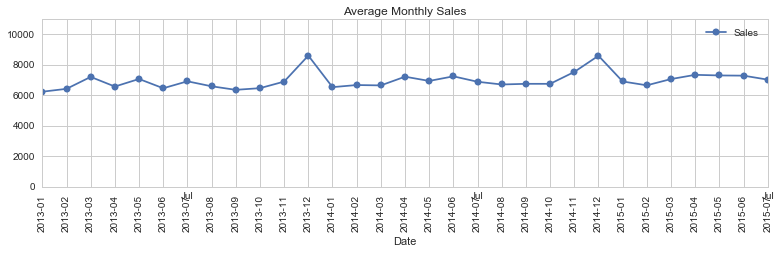

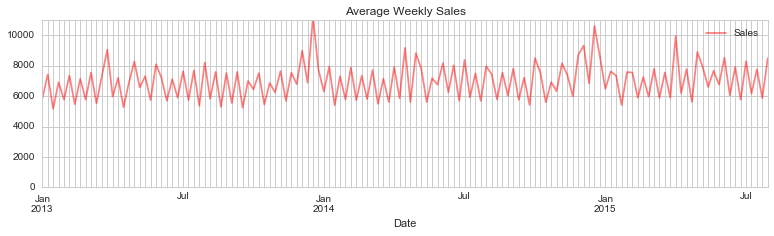

In [575]:
ax1 = monthly.plot(y='Sales', title = "Average Monthly Sales", marker='o',figsize=(13,3),
             rot=0, ylim=(0,11000), xticks=monthly.index.tolist(), legend=True)
ax1.set_xticklabels(["%d-%02d" % (x.year, x.month) for x in monthly.index.tolist()], rotation=90);

ax2 = weekly.plot(y='Sales', title="Average Weekly Sales", color='r', alpha=0.5,  figsize=(13,3),
             rot=0, ylim=(0,11000), xticks=weekly.index.tolist(), legend=True)

#handles, labels = ax.get_legend_handles_labels()
#lg = ax.legend(handles, ['Montly Sales', 'Weekly Sales'])

### How does various features affect sales in general?###

In [576]:
def BoxPlotGroupBy(y, group, axis):
    ax = sns.boxplot(train_df[y], groupby = train_df[group], 
                     order = np.sort(pd.unique(train_df[group])), ax = axis)
    txt = ax.set_title(y + " grouped by " + group) 
    if axis is None:
        plt.show()


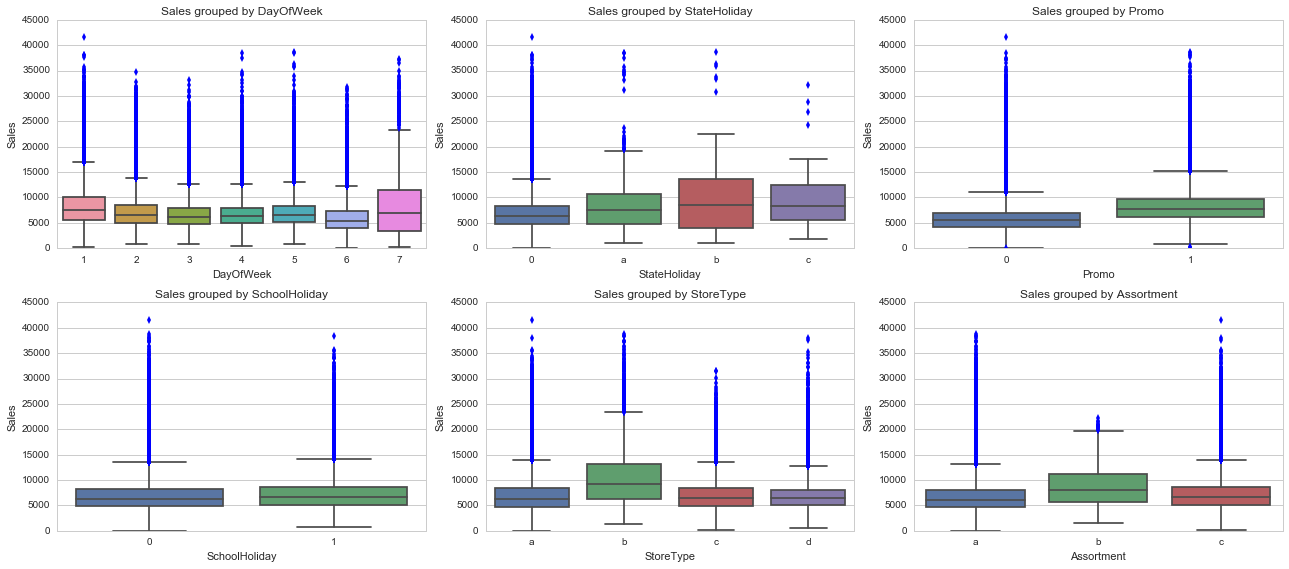

In [577]:
fig, ax_list = plt.subplots(2,3, figsize=(18,8))
ax_list = ax_list.ravel()

BoxPlotGroupBy('Sales', 'DayOfWeek', ax_list[0])
BoxPlotGroupBy('Sales', 'StateHoliday', ax_list[1])
BoxPlotGroupBy('Sales', 'Promo', ax_list[2])
BoxPlotGroupBy('Sales', 'SchoolHoliday', ax_list[3])
BoxPlotGroupBy('Sales', 'StoreType', ax_list[4])
BoxPlotGroupBy('Sales', 'Assortment', ax_list[5])
fig.tight_layout()
plt.show()

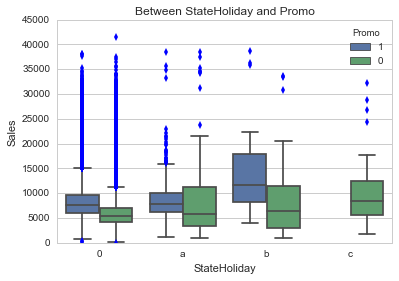

In [578]:
y = 'Sales'
ax = sns.boxplot(x = 'StateHoliday', y = 'Sales', hue = 'Promo', data = train_df)
ax.set_title("Between StateHoliday and Promo")

In [579]:
def PlotAvgSalesByGroup(group):
    train_df_by_group = train_df.groupby(group)

    monthly_by_group = train_df_by_group.resample('M', how='mean')

    fig, axis = plt.subplots(figsize=(15,4))
    
    groupItems = monthly_by_group.index.levels[0].tolist()
    colors = cm.rainbow(np.linspace(0, 1, len(groupItems)))
    
    for groupItem, c in zip(groupItems, colors):
        # Note: Should use .loc instead of .ix, otherwise will have problem if groupItem is an integer, as
        #       df.ix[[0]] will give you the first row instead of the first level of a multi-index df
        ax = monthly_by_group.loc[[groupItem]].plot(y='Sales', marker='o',
                 rot=0, legend=True, label=str(group) + " = " + str(groupItem), color=c, ax=axis)

    ax.set_xticks(range(len(monthly_by_group.ix[groupItems[0]].index)))
    ax.set_xticklabels(["%d-%02d" % (x.year, x.month) for x in monthly_by_group.ix[groupItems[0]].index.tolist()], 
                       rotation=90);

### Any relationship between Assortment and Average Monthly Sales?###

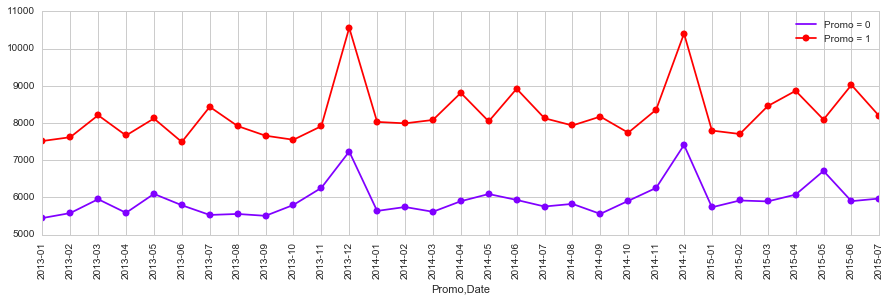

In [580]:
PlotAvgSalesByGroup('Promo')

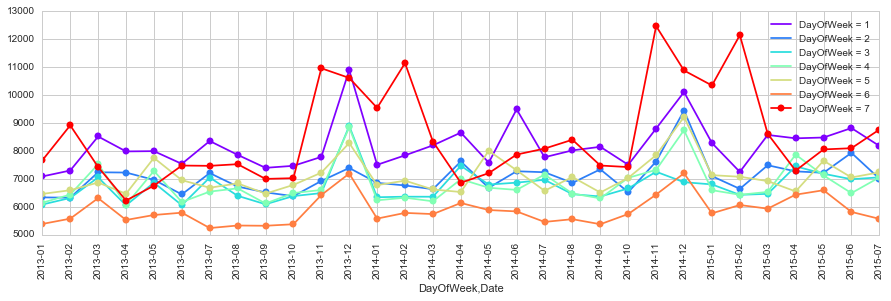

In [581]:
PlotAvgSalesByGroup('DayOfWeek')

### Any relationship between Store Attributes and Average Monthly Sales?###

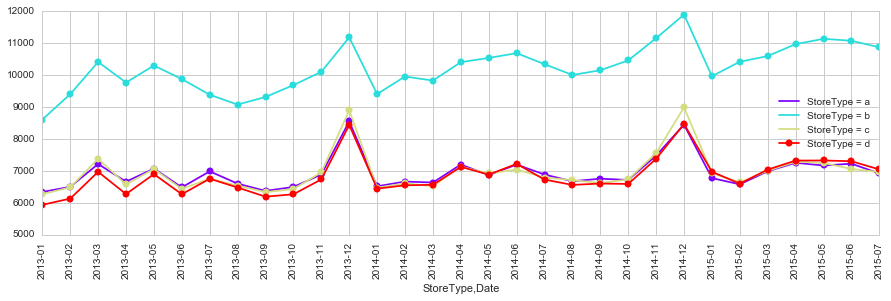

In [582]:
PlotAvgSalesByGroup('StoreType')

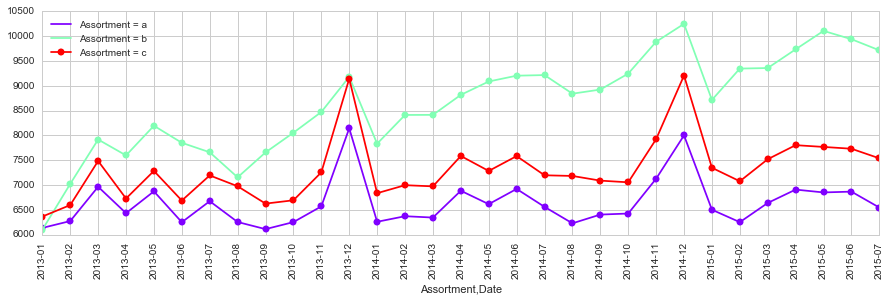

In [583]:
PlotAvgSalesByGroup('Assortment')

### Does the opening of a competitor have impact to the average sales of a store? ###


In [731]:
# How many stores have OpenDay earlier than CompetitorOpenDay?
store_openday_earlier = store_df['OpenDay'] < store_df['CompetitorOpenDay']
print "OpenDay earlier:", np.sum(store_openday_earlier)
print "Out of:", len(store_df)
print "%%: %.2f" % (np.sum(store_openday_earlier)/float(len(store_df)))

OpenDay earlier: 191
Out of: 1115
%: 0.17


In [732]:
storeid_openday_earlier = store_df[store_openday_earlier]['Store']
#store_df[store_df['Store'].isin(storeid_openday_earlier)].ix[:,['OpenDay', 'CompetitorOpenDay']]
#print storeid_openday_earlier

# The set of all records for stores which opened earlier than its competitor
train_openday_earlier_df = train_df[train_df['Store'].isin(storeid_openday_earlier)]

# Add a column to mark days which happened after a competitor has opened
train_openday_earlier_df.loc[:,'AfterCompOpened'] = train_openday_earlier_df.index >= \
                                                train_openday_earlier_df.ix[:, 'CompetitorOpenDay']
    
#print train_openday_earlier_df[train_openday_earlier_df['Store'] == 1111].ix[:,\
#                                                        ['AfterCompOpened', 'CompetitorOpenDay']]

In [733]:
# Calculate the mean sales of each store, with the days grouped by whether it's 
# before or after the competitor has opened.
s = train_openday_earlier_df.groupby(['Store', 'AfterCompOpened'])['Sales'].mean()
d = pd.DataFrame(d)
idx = pd.IndexSlice

In [734]:
# Three stores seem to have no 'average sales' when AfterCompOpened is True
s1 = set(d.loc[idx[:,True],:]['Sales'].index.get_level_values(0))
s2 = set(d.loc[idx[:,False],:]['Sales'].index.get_level_values(0))
s2 - s1

#len(d.loc[idx[:,False],:]['Sales'])

{688, 1020, 1072}

In [751]:
# Calculate the % change before and after
beforeSales = np.array(d.loc[idx[list(s1),False],:]['Sales']).astype('float')
afterSales = np.array(d.loc[idx[list(s1),True],:]['Sales']).astype('float')

impactToSales = ((afterSales - beforeSales) / beforeSales) * 100

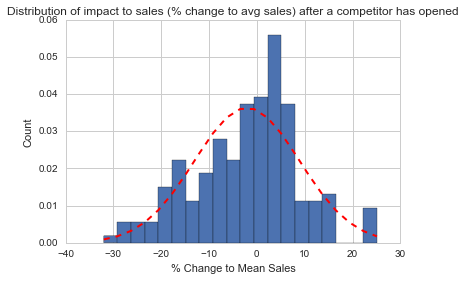

In [752]:
# Let's view the distribution of "change"

from scipy.stats import norm
import matplotlib.mlab as mlab
(mu, sigma) = norm.fit(impactToSales)

fig, ax = plt.subplots()
n, bins, patches = ax.hist(impactToSales, bins=20, normed=1)
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

ax.set_title("Distribution of impact to sales (% change to avg sales) after a competitor has opened")
plt.xlabel("% Change to Mean Sales")
plt.ylabel("Count")

**Note**: There doesn't seem to be a real impact to **average** sales after a competitor has opened.